# Connecting with the Credo AI Governance Platform

## Overview
Connecting with the Credo AI Governance Platform is straightforward using Lens. After following this tutorial you'll be up and running!

### Config File
First, ensure you have a `config` file somewhere on your computer. The default location where Lens will look for it is `~/.credoconfig`. The structure of the config should look like this

```
TENANT={tenant name} # Example: credoai
CREDO_URL=<your credo url>  # Example: https://api.credo.ai 
API_KEY=<your api key> # Example: JSMmd26...
```

This config gives Lens API access to the Governance Platform.

### Connecting to a particular model, dataset, or AI Solution

Lens connects to the Governance Platform via a `CredoGovernance` object. This specifies the IDs of the AI Solution, model and data you want to associate your assessments with. The IDs are found in the url of your AI solution or model.

For instance, the AI Solution ID is found here: `...credo.com/ai-solutions/{ai_solution_id}`

And the model Id is found here: `...credo.com/models/{model_id}`

## Train your Model

Some quick setup... This is all of your datascience work before assessment and integration with Credo AI.

In [1]:
# imports for example data and model training
from credoai.data import fetch_creditdefault
from sklearn.ensemble import GradientBoostingClassifier

# Base Lens imports
import credoai.lens as cl



Failed to import tensorflow. Please note that tensorflow is not installed by default when you install tensorflow_hub. This is so that users can decide which tensorflow package to use. To use tensorflow_hub, please install a current version of tensorflow by following the instructions at https://tensorflow.org/install and https://tensorflow.org/hub/installation.




In [2]:
data = fetch_creditdefault()
X = data['data'].drop(columns=['SEX'])
y = data['target']
sensitive_feature = data['data']['SEX']

model = GradientBoostingClassifier()
model.fit(X,y)

GradientBoostingClassifier()

## Using Lens

This is going to be familiar if you've gone through our quickstart tutorial! The only addition is the use of a `CredoGovernance` object.

The CredoGovernance object gives Lens a few features.

* The ability to get an alignment spec from the AI Solution (created during the aligned process). This alignment spec can be supplemented (or overwritten) with an alignment spec you define in code and pass to Lens.
* The ability to easily export metrics and reports.

With that said, let's see how this works in practice.

In [18]:
credo_model = cl.CredoModel(name='credit_default_classifier',
                            model=model)

credo_data = cl.CredoData(name='UCI-credit-default',
                          X=X, 
                          y=y.astype(int),
                          sensitive_features=sensitive_feature)

# NOTE! This extra artifact is needed to connect to Credo AI's Governance Platform
credo_governance = cl.CredoGovernance(ai_solution_id="qiuvbTdKvdUS93qhUS5bbd",
                                      model_id="XHbrDmVRxabF8noAGrvVF4"
                                     )

In [19]:
# specify the metrics that will be used by the FairnessBase assessment. 
# This spec will supplement (or overide!) whatever spec is 
# pulled down from the Governance Platform
alignment_spec = {
    'FairnessBase': {'metrics': ['precision_score']}
}

#### Run Lens

In addition to the model and data, we can pass the CredoGovernance object. This is how Lens knows which AI solution, model and/or data to interacts with. If you are running assessments on multiple models, you'll create a separate `CredoGovernance` object (and separate Lens instances) for each.

That's it!

In [20]:
from credoai.assessment import FairnessBaseAssessment
lens = cl.Lens(model=credo_model,
               governance=credo_governance,
               assessments = [FairnessBaseAssessment()],
               data=credo_data,
               spec=alignment_spec)

In [21]:
# just add the export option and the metrics will be sent to the Governance Platform.
lens.run_assessments(export=True)

{'FairnessBase': {'fairness':                     value    kind
  metric_type                      
  precision_score  0.000543  parity,
  'disaggregated_results':          precision_score
  SEX                     
  female          0.695954
  male            0.695411
  overall         0.695652}}

{'FairnessBase': [<Figure size 360x360 with 1 Axes>,
  <Figure size 1080x216 with 4 Axes>,
  <Figure size 1080x216 with 4 Axes>,
  <Figure size 1080x216 with 4 Axes>]}

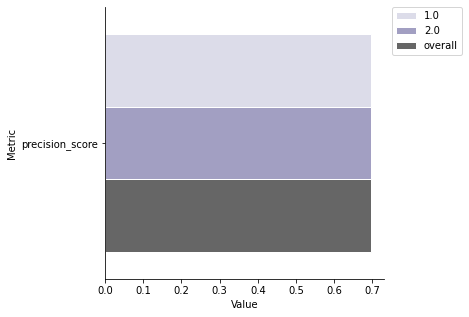

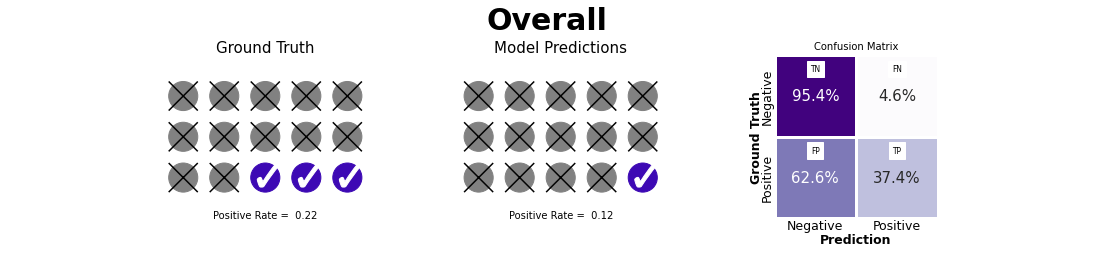

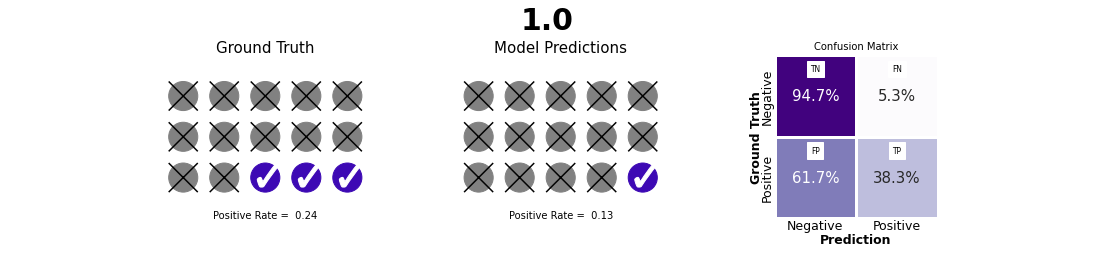

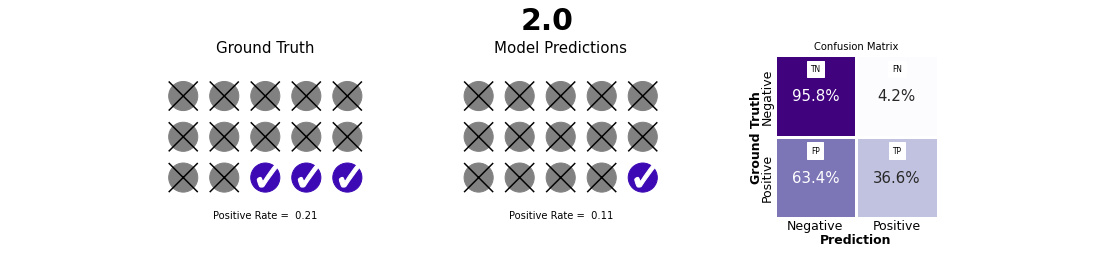

In [16]:
# Reports can be exported too!
lens.create_reports(export=True)